In [8]:
import yfinance as yf
import pandas as pd

tsla = yf.Ticker('TSLA')
tesla_data = tsla.history(period='max')
tesla_data.reset_index(inplace=True)

print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [10]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
from bs4 import BeautifulSoup
import time

# Set up the webdriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# URL of the page to scrape
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

# Open the webpage
driver.get(url)
# Allow some time for the page to load
time.sleep(5)
# Get the page source and close the driver
page_source = driver.page_source
driver.quit()

# Parse the page source with BeautifulSoup
soup = BeautifulSoup(page_source, 'html.parser')
# Find the table containing the revenue data
tables = soup.find_all('table')

# Select the correct table (Table 1 for quarterly revenue data)
df = pd.read_html(str(tables[1]))[0]
# Clean up the DataFrame (e.g., remove unnecessary columns or rows)
tesla_revenue = df.dropna()
# Display the last five rows of the DataFrame
print(tesla_revenue.tail())

   Tesla Quarterly Revenue (Millions of US $)  \
54                                 2010-09-30   
55                                 2010-06-30   
56                                 2010-03-31   
58                                 2009-09-30   
59                                 2009-06-30   

   Tesla Quarterly Revenue (Millions of US $).1  
54                                          $31  
55                                          $28  
56                                          $21  
58                                          $46  
59                                          $27  


In [11]:
import yfinance as yf
import pandas as pd

# Extract GameStop stock data
gme = yf.Ticker('GME')

# Get all available historical market data
gme_data_all = gme.history(period='max')

# Reset the index
gme_data_all.reset_index(inplace=True)

# Display the first five rows
print(gme_data_all.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [13]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
from bs4 import BeautifulSoup
import time

# Set up the webdriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# URL of the page to scrape
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'

# Open the webpage
driver.get(url)

# Allow some time for the page to load
time.sleep(5)

# Get the page source and close the driver
page_source = driver.page_source
driver.quit()

# Parse the page source with BeautifulSoup
soup = BeautifulSoup(page_source, 'html.parser')

# Find the table containing the revenue data
tables = soup.find_all('table')

# Select the correct table (usually the first table is the required one)
df = pd.read_html(str(tables[1]))[0]

# Clean up the DataFrame (remove rows with missing values)
df = df.dropna()

# Rename columns to match the required output format
df.columns = ['Date', 'Revenue']

# Convert 'Revenue' column to numeric, removing any non-numeric characters
df['Revenue'] = df['Revenue'].replace('[\$,]', '', regex=True).astype(int)

# Display the last five rows of the DataFrame
gme_revenue = df.tail()

# Print the last five rows
print(gme_revenue)


          Date  Revenue
57  2010-01-31     3524
58  2009-10-31     1835
59  2009-07-31     1739
60  2009-04-30     1981
61  2009-01-31     3492


[*********************100%%**********************]  1 of 1 completed


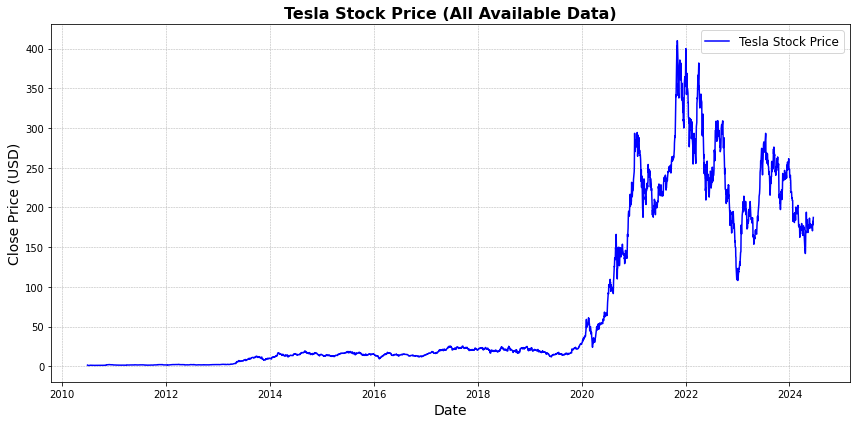

In [21]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download all available Tesla stock data
tesla_data = yf.download('TSLA', period='max')

# Define the make_graph function
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label='Tesla Stock Price', color='blue', linewidth=1.5)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Close Price (USD)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

# Plot the Tesla stock data
make_graph(tesla_data, 'Tesla Stock Price (All Available Data)')

[*********************100%%**********************]  1 of 1 completed


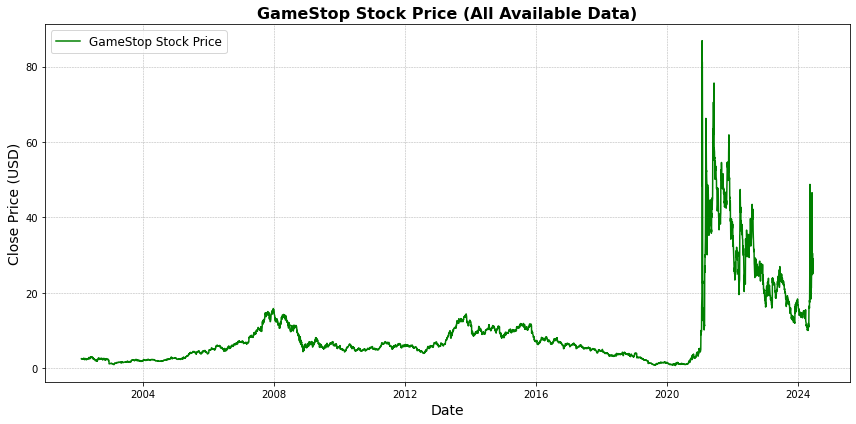

In [22]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download all available GameStop stock data
gme_data = yf.download('GME', period='max')

# Define the make_graph function
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label='GameStop Stock Price', color='green', linewidth=1.5)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Close Price (USD)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

# Plot the GameStop stock data
make_graph(gme_data, 'GameStop Stock Price (All Available Data)')
